1. Sample $10^4$ points uniformly over the hypercube $[0,1]^d$ (denote this set by $\mathcal X$).
2. For $d\in\{1,2,3,5,10,20,50,100,500\}$ and for the Euclidean distance $\rho$ find
- $\min d(x,\tilde x)$: minimum over $x,\tilde x\in \mathcal X$
- $\overline{d(x,\tilde x)}$: average over $x,\tilde x\in \mathcal X$
- $\max d(x,\tilde x)$: maximum over $x,\tilde x\in \mathcal X$
- $\overline{d_{NN1}(x)}$: average distance to the nearest neighbor
- $ \max d_{NN1}(x)$: maximal distance to the nearest neigbor 

Collect the results in a table

In [2]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from IPython.display import display, HTML

def remove_diag(x):
    x_no_diag = np.ndarray.flatten(x)
    x_no_diag = np.delete(x_no_diag, range(0, len(x_no_diag), len(x) + 1), 0)
    x_no_diag = x_no_diag.reshape(len(x), len(x) - 1)
    return x_no_diag

In [14]:
amount = 10**4
d = [1,2,3,5,10,20,50,100,500]
table = pd.DataFrame(columns = ['p','min','mean','max','mean_nn1','max_nn1'])

for p in d:
    x =np.random.uniform(0,1,(amount,p))
    e_d = euclidean_distances(x,x)
    e_d = remove_diag(e_d)
    e_d = np.sort(e_d)

    min_d = e_d.min()
    mean_d = e_d.mean()
    max_d = e_d.max()
    nn1 = np.amin(e_d,axis = 1)
    mean_nn1 = nn1.mean()
    max_nn1 = nn1.max()

    table = table.append({'p':p,'min':min_d,'mean':mean_d,'max':max_d,'mean_nn1':mean_nn1,'max_nn1':max_nn1}, ignore_index = True)

table = table.astype({'p': 'int32'})
display(HTML(table.to_html(index=False)))

p,min,mean,max,mean_nn1,max_nn1
1,1.645044e-08,0.334518,0.999700,0.000050,0.000407
2,1.029971e-04,0.522197,1.406013,0.005059,0.016694
3,1.449901e-03,0.662018,1.663718,0.026087,0.068571
5,1.780097e-02,0.880825,1.947127,0.109458,0.220282
10,1.592570e-01,1.266034,2.458332,0.386745,0.623311
20,5.597433e-01,1.810173,3.150028,0.897181,1.201163
50,1.560166e+00,2.877202,4.117182,1.972453,2.325672
100,2.721942e+00,4.073865,5.344809,3.181006,3.573877
500,7.848454e+00,9.124060,10.465203,8.248836,8.651028


3. Generate $10^4$ point such that each point with probability $1/2$
- is sampled from $N(\mu,I)$, $\mu=(a,\dots,a)\in\mathbb R^d$ and gets label $0$
- is sampled from $N(\mu,I)$, $\mu=(-a,\dots,-a)\in\mathbb R^d$ and gets label $1$

Put $a=\frac{2}{\sqrt{d}}$ (the Bayes error will be $\approx 0.023$ for all $d$). 

For $k = 3, 7, 15$  train a $k$-NN classifier for increasing dimensions $1\le d\le 500$ and monitor its performance evaluated by 10 times repeated 10-fold CV. For each $k$ draw the graphs of the mean  missclassification error as a function of $d$.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

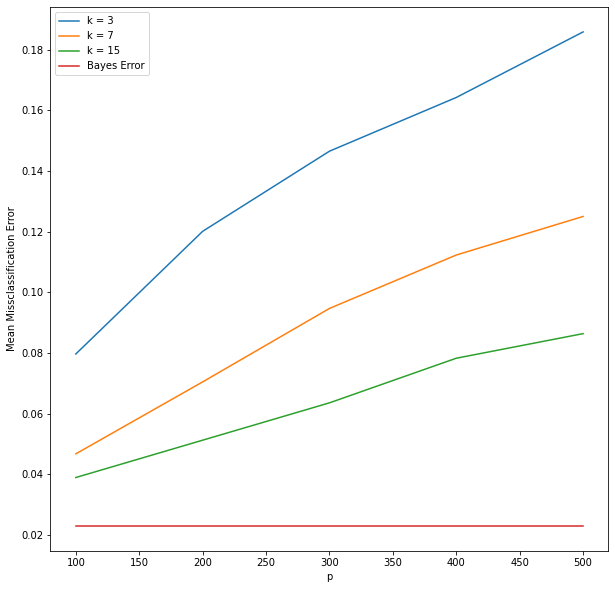

In [16]:
np.random.seed(42)
amount = 10**4


fig, axes = pyplot.subplots(1,1, figsize=(10, 10))
axes.set_xlabel('p')
axes.set_ylabel('Mean Missclassification Error')


k = [3,7,15]
d = [100,200,300,400,500]
for n in k:
    result = []
    for p in d:

        a = 2/np.sqrt(p)
        X=np.random.randn(amount, p)
        Y = np.random.randint(0,2,(amount,1))

        for i in range(len(X)):
          if Y[i] == 0:
            X[i] = X[i] - a
          else:
            X[i] = X[i] + a
        Y = np.zeros((amount, p)) + Y
        
        neigh = KNeighborsClassifier(n)
        scores = cross_val_score(neigh, X, Y, cv=10)
        result.append(np.mean(1 - scores))
    axes.plot(d, result, label='k = '+str(n))

axes.plot(d, [0.023 for i in range(len(d))], label='Bayes Error')
axes.legend(loc = 0)